# Introduction to Root Finding Part 2

## Open Methods

Open methods do not require an initial interval and typically start from a single initial guess. They can converge more rapidly than closed methods but may fail if the initial guess is not close to the actual root.

###Common Open Methods


There are several methods that are based on initial guess such as:   
- Newton-Raphson Method   
- Secant Method   
- Fix Point Iteration

#### Newton-Raphson Method

The Newton-Raphson method is an iterative numerical technique used to find approximate roots of a real-valued function. It is based on the idea of using the tangent line at a given point to approximate the function's behavior near that point.


The iterative formula for the Newton-Raphson Method is given by:
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

Where:   
**$x_n$**: The current approximation of the root.   
**$f(x_n)$**: The value of the function at $x_n$.    
**$f'(x_n)$**: The value of the derivative at $x_n$.   

<center>

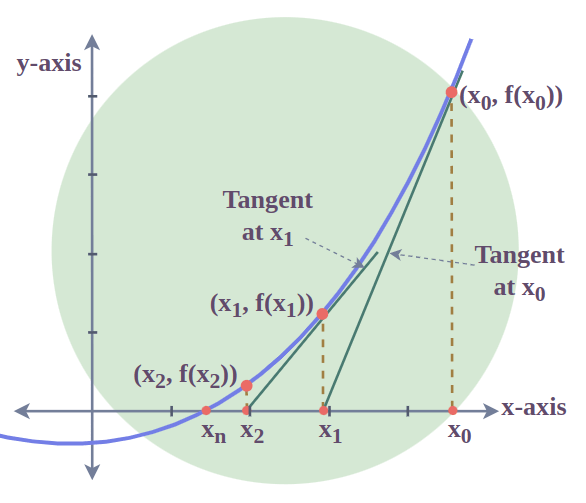

The Newton-Raphson method is known for its quadratic convergence when the initial guess is close to the root. This means that the number of correct digits approximately doubles with each iteration. However, if the guess is far from the root, the convergence can be slow or even linear, which is significantly less efficient.

**Task 1**   
Create a python function name newton_raphson that implemt Newton-Raphson method for finding a root of a function. The function should have the following arguments:   

- **f** : function : The function for which to find the root.   
- **df** : The derivative of the function.   
- **x0** : The initial guess.   
- **tol** : The tolerance for convergence.   
- **max_iter** : The maximum number of iterations.   

The function should return:   
- **xn** : The approximate root.   
- **iter_count** : The number of iterations performed.

In [ ]:
## write your code below


<details>
<summary>Click to reveal answer</summary>

```python
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < tol:
            return xn, n
        else:
            dfxn = df(xn)
            if abs(dfxn) < tol:
                print('Zero derivative. No solution found.')
                return
            else:
                xn = xn - fxn/dfxn
    print('Exceeded maximum iterations. No solution found.')

```
</details>

**Task 2**   
Test your function that you created in task 1 for $f(x)=x^2-4$ for differnt intial guesses, $x_0 =  [-5,-1,0,1,5]$?

In [ ]:
## write your code below



<details>
<summary>Click to reveal answer</summary>

```python
print(newton_raphson(lambda x: x**2-4, lambda x: 2*x, -5))
print(newton_raphson(lambda x: x**2-4, lambda x: 2*x, -1))
print(newton_raphson(lambda x: x**2-4, lambda x: 2*x, 0))
print(newton_raphson(lambda x: x**2-4, lambda x: 2*x, 1))
print(newton_raphson(lambda x: x**2-4, lambda x: 2*x, 5))
```
</details>

##### Failure of Newton-Raphson Method

While Newton-Raphson's method is widely used due to its rapid convergence properties, the need of this method to the calculation of the function derivative is considered one of its big drawbacks. For example, if you try to find the roots of $f(x)=sin(cos(e^x))=0$, you have to find its derivative first which is very difficult to find and might be much more complecated than the function itself.   
  


**Task 3**   
use what you have learned in sympy to find the derivative of $f(x)=sin(cos(e^x))$.


In [ ]:
## write your code below


<details>
<summary>Click to reveal answer</summary>

```python
import sympy as sp
x = sp.symbols('x')
f=sp.sin(sp.cos(sp.exp(x)))
f.diff(x)
```
</details>

Additionally, there are specific scenarios where the method can fail or converge slowly. The method can fail or converge slowly under several conditions:

**1. Zero Derivative**   
If the derivative is zero at any iteration, the formula becomes undefined. This situation often occurs at local maxima or minima, where the tangent line is horizontal. see the graph below:

<center>

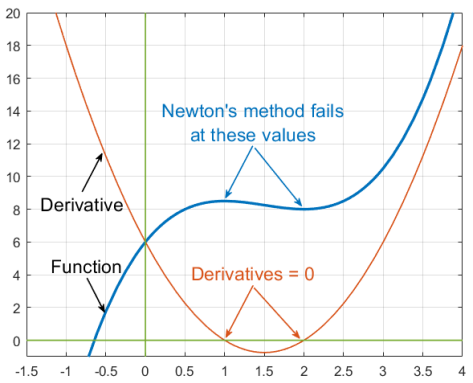

**Task 4**   
Test your function on $f(x)=e^\frac{1}{x^2}$ and inital guess of $x_0=0$?

In [ ]:
## write your code below


<details>
<summary>Click to reveal answer</summary>

```python
import math
newton_raphson(lambda x: math.cos(x), lambda x:-math.sin(x), 0)
```
</details>

2. **Oscillation**: If the function has inflection points or local extrema near the initial guess, the method may oscillate between values without converging to a root.

<center>

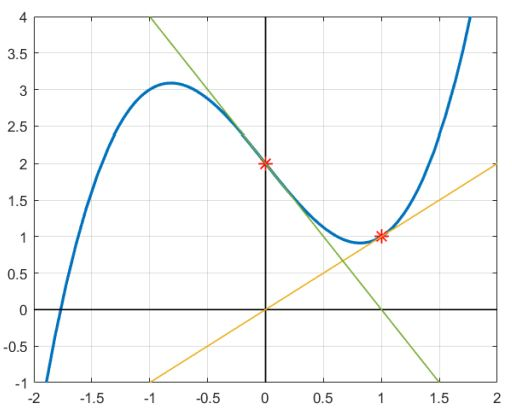

**Task 5**   
Test your function on $f(x) = x^5-x+1$ at $x_0 = 1$?

In [ ]:
## write your code below


<details>
<summary>Click to reveal answer</summary>

```python
newton_raphson(lambda x: x**5-x+1, lambda x:5*x**4-1, 1)
```
</details>

###Secant Method


The Secant Method is a numerical technique used to find the roots of a function. It is particularly useful when the derivative of the function is difficult or impossible to compute, as it does not require the calculation of derivatives unlike the Newton-Raphson method


The Secant Method is a root-finding algorithm that uses a sequence of secant lines (lines connecting two points on the function) to approximate the root of a function 𝑓(𝑥). It is based on the idea of linear interpolation between two points on the function.

Given two initial approxmiation $x_0$ and $x_1$, the formula for the next approximation $x_2$ is given by:
$$x_{n+1} = x_n-\frac{f(x_b)(x_n -x_{n-1})}{f(x_n) - f(x_{n-1})}$$

This formula is derived from the equation of the secant line that passes through the points $(x_{n-1},f(x_{n-1}))$ and $(x_n,f(x_n))$.

**Task 6**   
write a python function named secant that implement the secant method. The function should have the following parameters:   
- **f**: function to find its root.   
- **x0**: first initial guess.    
- **x1**: second initial guess.   
- **miter**: maximum number of iteration.   
- **tol**: tolerance level for stopping the iteration.   

The function should return the root of the function and the number of iterations used in the calculations.

In [ ]:
## write your code below


<details>
<summary>Click to reveal answer</summary>

```python
def secant(f, x0, x1, tol=1e-6, max_iter=100):
    x_prev = x0
    x = x1
    counter=0
    for i in range(max_iter):
        counter += 1
        x_new = x - (f(x) * (x - x_prev)) / (f(x) - f(x_prev))
        if abs(x_new - x) < tol:
            return x_new, counter
        x_prev = x
        x = x_new
    print('Exceeded maximum iterations. No solution found.')
```
</details>

**Task 7**   
Test your function that you created in task 6 for $f(x)=x**2-4$ using your own guesses?

In [ ]:
## write your code below


<details>
<summary>Click to reveal answer</summary>

```python
secant(lambda x: x**2-4, 3, 5)
```
</details>

There are some advantages for the secant method over the other methods which include:   
- **No Derivative Required**: Unlike the Newton-Raphson method, the Secant Method does not require the computation of derivatives, making it applicable to a wider range of functions.   
- **Faster Convergence**: The Secant Method converges faster than the Bisection Method, especially when the initial guesses are close to the actual root.   
- **Simplicity**: The method is relatively simple to implement and understand.

The secant methods has some disadvantages which include:   
- **Convergence Issues**: The method may not converge if the initial guesses are not sufficiently close to the root or if the function behaves poorly in the vicinity of the root.   
- **No Guaranteed Error Bounds**: Unlike methods that use derivatives, the Secant Method does not provide guaranteed error bounds for the approximations.   
- **Possible Oscillation**: The method can oscillate between values if the function has certain characteristics, leading to failure in finding the root

`Scipy.optimize` module provide a function named `newton()` that implement both Newton-Raphson methond and secant method in one function. If the user provides function first derivative the Newton-Raphson method is used. If the first derivative is not provided, the secant methods is used.

**Task 8**   
Based on your knowledge of scipy.optimize module, use the method `newton()` to find the root of $f(x)=x^2-4$ with Newton-Raphson method and secant method by choosing the right parameter for each method?

In [20]:
## write your code below


<details>
<summary>Click to reveal answer</summary>

```python
from scipy.optimize import newton
print(newton(lambda x:x**2-4,1,lambda x: 2*x))
print(newton(lambda x:x**2-4,x0=0,x1=1))
```
</details>

###Fixed Point Iteration


Fixed Point Iteration, also known as circular calculation or successive substitution requires rearranging the equation into a form where you can express 𝑥 in terms of itself. This is done by finding a function
𝑔(𝑥) such that:
$$x=g(x)$$
Where,    
𝑔(𝑥) is a function you create from your original equation.

<center>

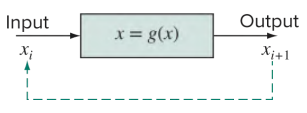

The algorithm steps required for finding a root of an equation with fixed point iteration include the following:   
    
- Rearrange the equation to isolate x on one side, froming $x = g(x)$.
   
- Pick a starting value $x_0$. This should be close to where you think the root is.
- Plug your initial guess into 𝑔(𝑥) to get a new value:
$$x_1 = g(x_0)$$
- Use this new value to get the next one:
$$x_2 = g(x_1)$$
- Repeat this process:
$$x_{n+1} = g(x_n)$$
- Check for convergence using tolerance value.



**Task 9**.  
write python function name fixed_point that implement the fixed point iteration. your function should have the following input parameters:   
- **f**: function that satisfy x=g(x) from f(x)=0.   
- **x0**: the initial guess.   
- **miter**: maximum number of iteration.   
- **tol**: tolerance value to stop the iteration calculation.   
The function should return the root of the function f and the number of iterations used in the calculations.

In [ ]:
## write your code below


<details>
<summary>Click to reveal answer</summary>

```python
def fixed_point(f, x0, tol=1e-6, max_iter=100):

    for i in range(max_iter+1):
        x1 = f(x0)
        if abs(x1 - x0) < tol:
            return x1, i+1
        x0 = x1
    print('Exceeded maximum iterations. No solution found.')
```
</details>

**Task 10**   
Test your function that you created in  task 9 on $f(x)=\sqrt{2}-x$ using your own initial guess?

In [ ]:
## write your code below


<details>
<summary>Click to reveal answer</summary>

```python
fixed_point(lambda x:(x+2**0.5)/2, 0, tol=1e-6, max_iter=100)
```
</details>

**Task 11**   
A. Rearrange $f(x)=x-e^{-x}$ to be in these two forms:   
- $x=e^{-x}$      
- $x=-lnx$   

B. Use these two forms as input to the fixed_point function that you created in task 9 to find the root of $f(x)$ using an initial guess of $x_0=0$ and $x_0=0.5$, respectively?   
C. Does fixed point iteration function depends on the form of the function.

In [ ]:
## write your code below for Part A


<details>
<summary>Click to reveal answer</summary>

```python
from math import exp
print(fixed_point(lambda x:exp(-1*x), 0))
```
</details>

In [ ]:
## write your code below for Part B


<details>
<summary>Click to reveal answer</summary>

```python
from math import log
print(fixed_point(lambda x:-1*log(x), 0))
```
</details>

In [ ]:
## write your answer below for Part C.


<details>
<summary>Click to reveal answer</summary>

```python
# yes the form of the function after rearrangement affects the result of the fixed point iteration.
```
</details>

The convergence of Fixed Point Iteration depends on several key factors related to the function 𝑔(𝑥) that you derive from your original equation 𝑓(𝑥)= 0. Here's a breakdown of when the method converges and when it may diverge:   
- The function 𝑔(𝑥) should be continuous in the interval of interest. If f(𝑥) is not continuous, the iterations may behave unpredictably.   
- For the method to converge, 𝑔(𝑥) should ideally be a contraction mapping in the neighborhood of the fixed point. This means:
$$|g'(x)|<1$$
for all 𝑥 in the interval around the fixed point. If the derivative of 𝑔(𝑥) is less than 1 in absolute value, the iterations will tend to get closer to the fixed point.   
- The choice of the initial guess $x_0$ should be close to the actual fixed point. If $𝑥0$ is too far from the fixed point, the method may not converge.